# K-NN Method

###  Necessary imports and libraries

In [72]:
%matplotlib inline
import sklearn                                              # DM library
import matplotlib.pyplot as plt                             # To show plots
import numpy as np                                          # Maths library
import sklearn.model_selection as cv                        # For cross-validation
import sklearn.neighbors as nb                              # To use KNN  
import pandas as pd                                         # To read CSV
import warnings                                             # To avoid printing warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

#pd.set_option('display.max_rows', None) 
pd.set_option('display.max_rows', 21)  

pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.precision', 3)

## 1- Read the Data

In [73]:
# Dataset for training generated during preprocessing
trainingData = pd.read_csv(r'../Datasets/training-dataset-reduced.csv')
#trainingData.info()

trainingInput = trainingData
trainingInput = trainingInput.drop('Unnamed: 0', axis=1)    # Non needed column generated during preprocessing
trainingInput = trainingInput.drop('y', axis=1)             # We remove the column we want to predict in the output

trainingOutput = trainingData
trainingOutput = trainingOutput['y']                        # We keep only the column we want to predict in the output


# Dataset for testing generated during preprocessing
testingData = pd.read_csv(r'../Datasets/testing-dataset-reduced.csv')
#testingData.info()

testingInput = testingData
testingInput = testingInput.drop('Unnamed: 0', axis=1)      # Non needed column generated during preprocessing
testingInput = testingInput.drop('y', axis=1)               # We remove the column we want to predict in the output

testingOutput = testingData
testingOutput = testingOutput['y']                          # We keep only the column we want to predict in the output


## 2- Simple Cross-Validation

In [115]:
knc = nb.KNeighborsClassifier()                             # We create a KNN classifier
knc.fit(trainingInput, trainingOutput)                      # We train the classifier
print(knc.score(testingInput, testingOutput))               # We obtain the accuracy score of learned classifier on test data

0.7572757275727573


In [116]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

outputPrediction = knc.predict(testingInput)
print(sklearn.metrics.confusion_matrix(testingOutput, outputPrediction))

[[2293  688]
 [ 121  231]]


In [114]:
# Obtain Recall, Precision and F-Measure
from sklearn import metrics

print(metrics.classification_report(testingOutput, outputPrediction))

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      2981
         1.0       0.31      0.60      0.41       352

    accuracy                           0.82      3333
   macro avg       0.63      0.72      0.65      3333
weighted avg       0.88      0.82      0.84      3333



## 3- 10-Fold Cross-Validation

In [77]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=trainingInput,  
                            y=trainingOutput,  
                            cv=10, scoring='accuracy')  

# cv_scores is a list with 10 accuracies (one for each validation)
print("Scores for each validation:", cv_scores, "\n")
print("Mean of the 10 validations:", np.mean(cv_scores), "\n")
print("Standard deviation:", np.std(cv_scores))


Scores for each validation: [0.70314843 0.72713643 0.69115442 0.69565217 0.73313343 0.72113943
 0.68665667 0.6981982  0.75375375 0.6966967 ] 

Mean of the 10 validations: 0.7106669638153897 

Standard deviation: 0.020813394347059363


## 4- Finding parameters for K-NN

### Manually testing some parameters WITHOUT distance weighting:

In [38]:
# Results with different K parameters
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 1 neighbour:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 3 neighbours:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 5 neighbours:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 7 neighbours:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 9 neighbours:", np.mean(cv_scores))

Accuracy 1 neighbour: 0.6812679245962605
Accuracy 3 neighbours: 0.696718757738248
Accuracy 5 neighbours: 0.7106669638153897
Accuracy 7 neighbours: 0.7198146422284353
Accuracy 9 neighbours: 0.7246144945545245


### Manually testing some parameters WITH distance weighting:

In [39]:
# Results with different K parameters + distance weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1, weights='distance'), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 1 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3, weights='distance'), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 3 neighbours and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5, weights='distance'), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 5 neighbours and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7, weights='distance'), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 7 neighbours and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9, weights='distance'), X=trainingInput, y=trainingOutput,  cv=10)  
print("Accuracy 9 neighbours and distance weighting:", np.mean(cv_scores))

Accuracy 1 neighbour and distance weighting: 0.6812679245962605
Accuracy 3 neighbours and distance weighting: 0.7037688363025694
Accuracy 5 neighbours and distance weighting: 0.7142674158416288
Accuracy 7 neighbours and distance weighting: 0.7252159956058006
Accuracy 9 neighbours and distance weighting: 0.7295653974814394


### Automatically finding best parameters and plotting K variation

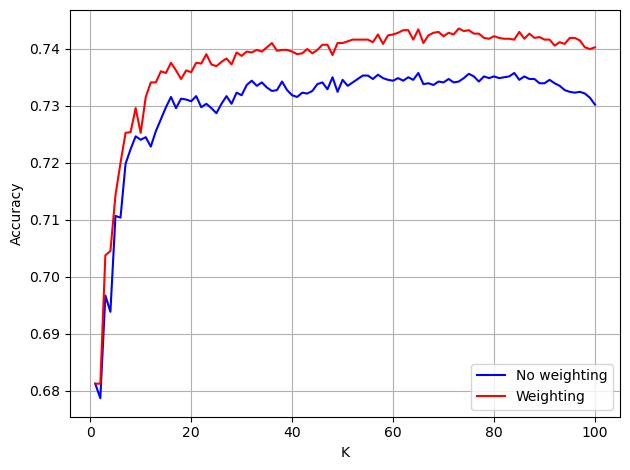

In [98]:
lr = []
for ki in range(1,101,1):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=trainingInput, y=trainingOutput, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,101,1),lr,'b',label='No weighting')

lr = []
for ki in range(1,101,1):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki, weights='distance'), X=trainingInput, y=trainingOutput, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,101,1),lr,'r',label='Weighting')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

### Automatically finding best parameters using the Grid Search method

In [117]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,101,1)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params, cv=10, n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(trainingInput, trainingOutput)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 73, 'weights': 'distance'} Accuracy= 0.7435129282205744


Applying models with best parameters found trained with all training data to the test set

In [109]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(trainingInput, trainingOutput)
pred=knc.predict(testingInput)
print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(testingOutput, pred), "\n")
print("Accuracy:", sklearn.metrics.accuracy_score(testingOutput, pred), "\n")
print ("Recall, Precision and F-Measure:")
print(sklearn.metrics.classification_report(testingOutput, pred))

Confusion matrix:
[[2444  537]
 [ 118  234]] 

Accuracy: 0.8034803480348035 

Recall, Precision and F-Measure:
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88      2981
         1.0       0.30      0.66      0.42       352

    accuracy                           0.80      3333
   macro avg       0.63      0.74      0.65      3333
weighted avg       0.89      0.80      0.83      3333



In [107]:
# Interval confidence
from statsmodels.stats.proportion import proportion_confint

epsilon = sklearn.metrics.accuracy_score(testingOutput, pred)
print("Can approximate by Normal Distribution?: ", testingInput.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/testingInput.shape[0])))
# or equivalent 
proportion_confint(count=epsilon*testingInput.shape[0], nobs=testingInput.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.803 +/- 0.013


(0.789990065145418, 0.816970630924189)

In [110]:
# Precison of class 1 is low compared with class 0. 
# Precision of "1" is more important. Let's change optimize parameters by defining precision for 1.

scorer = metrics.make_scorer(metrics.precision_score, average='macro', labels=[1])
#scorer = make_scorer(score_func=precision_score, pos_label=9, greater_is_better=True,average='micro')


params = {'n_neighbors':list(range(1,101,1)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1,scoring=scorer) 
clf.fit(trainingInput, trainingOutput)
print("Best Params=",clf.best_params_, "Precision=", clf.best_score_)

parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(trainingInput, trainingOutput)
pred=knc.predict(testingInput)
print(sklearn.metrics.confusion_matrix(testingOutput, pred))
print(sklearn.metrics.accuracy_score(testingOutput, pred))
print(metrics.classification_report(testingOutput, pred))


Best Params= {'n_neighbors': 16, 'weights': 'uniform'} Precision= 0.7668413298802644
[[2517  464]
 [ 141  211]]
0.8184818481848185
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      2981
         1.0       0.31      0.60      0.41       352

    accuracy                           0.82      3333
   macro avg       0.63      0.72      0.65      3333
weighted avg       0.88      0.82      0.84      3333

